# Distribucion uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000

data1 = np.random.uniform(a,b,n)

<IPython.core.display.Javascript object>


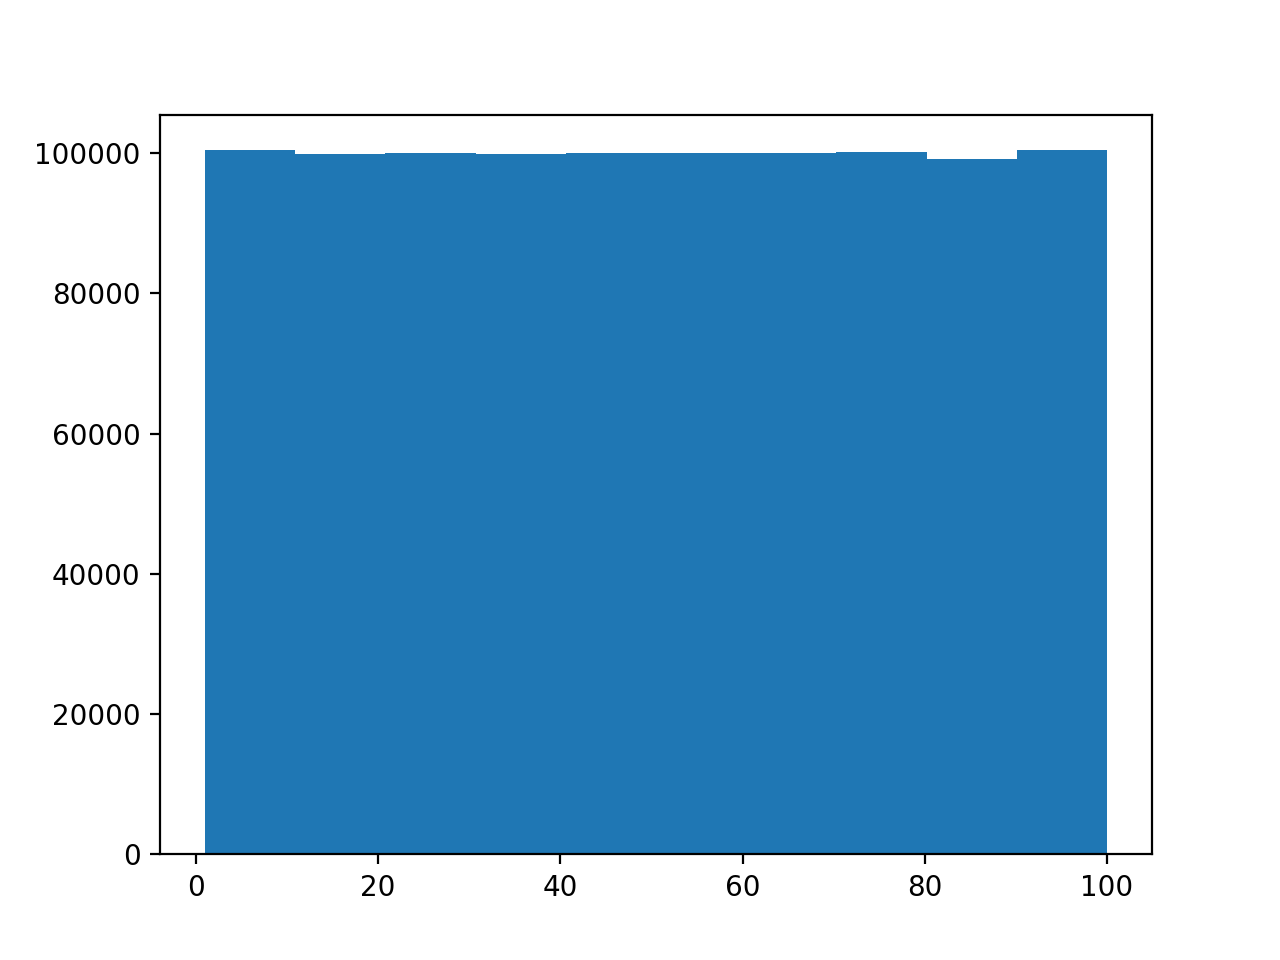

(array([100408.,  99843.,  99982.,  99861., 100075., 100024., 100052.,
        100154.,  99202., 100399.]),
 array([ 1.00004587, 10.90004097, 20.80003606, 30.70003116, 40.60002626,
        50.50002136, 60.40001646, 70.30001156, 80.20000666, 90.10000176,
        99.99999686]),
 <a list of 10 Patch objects>)

In [21]:
%matplotlib notebook
plt.hist(data1)

# Distribucion normal

In [4]:
data2 = np.random.randn(1000000)

<IPython.core.display.Javascript object>


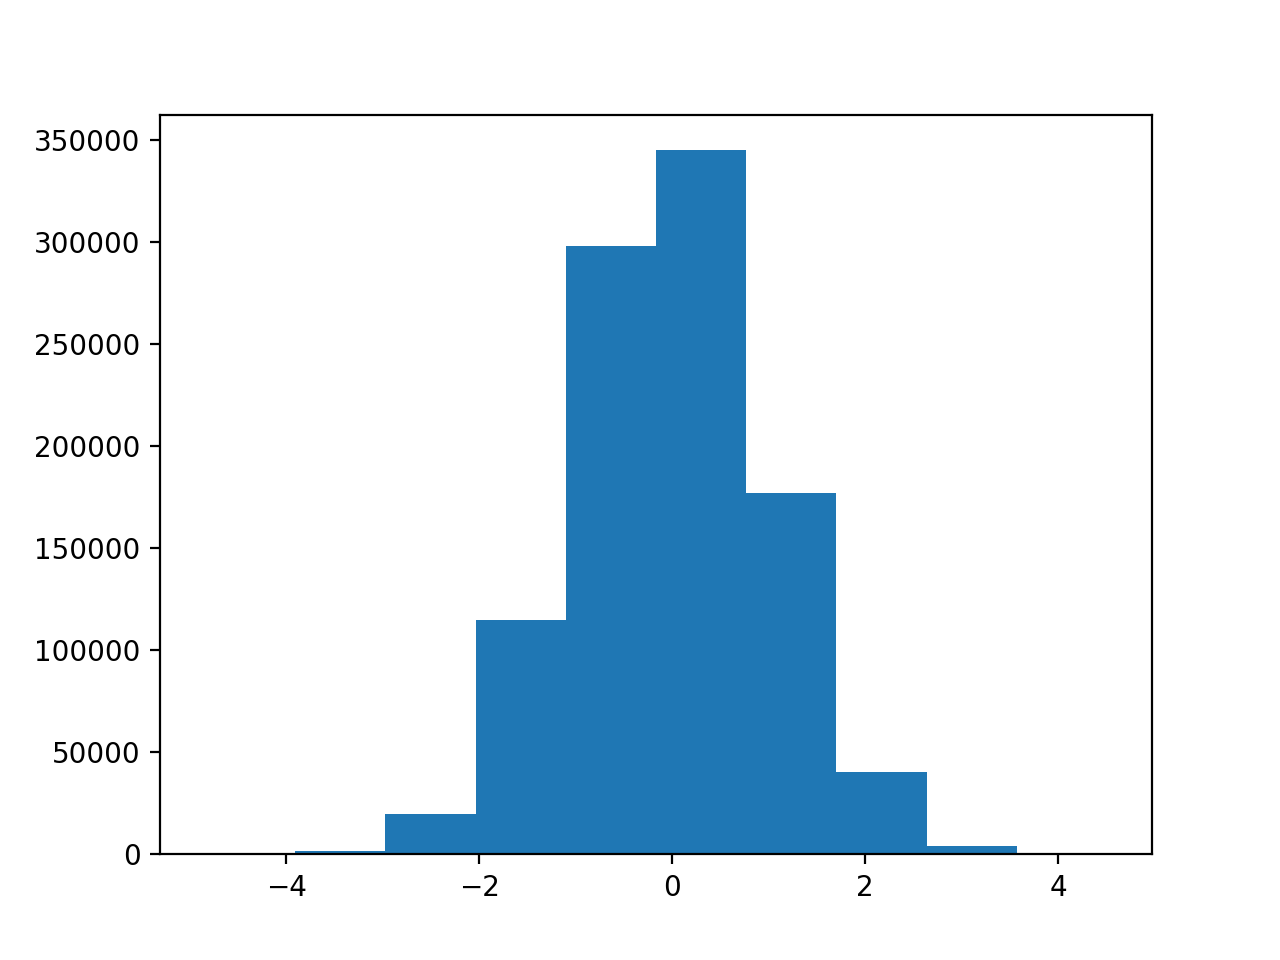

(array([4.90000e+01, 1.50700e+03, 1.96060e+04, 1.14910e+05, 2.97963e+05,
        3.44692e+05, 1.76791e+05, 4.02380e+04, 4.05200e+03, 1.92000e+02]),
 array([-4.83861115, -3.90422387, -2.9698366 , -2.03544932, -1.10106204,
        -0.16667476,  0.76771251,  1.70209979,  2.63648707,  3.57087434,
         4.50526162]),
 <a list of 10 Patch objects>)

In [22]:
%matplotlib notebook
plt.hist(data2)

<IPython.core.display.Javascript object>


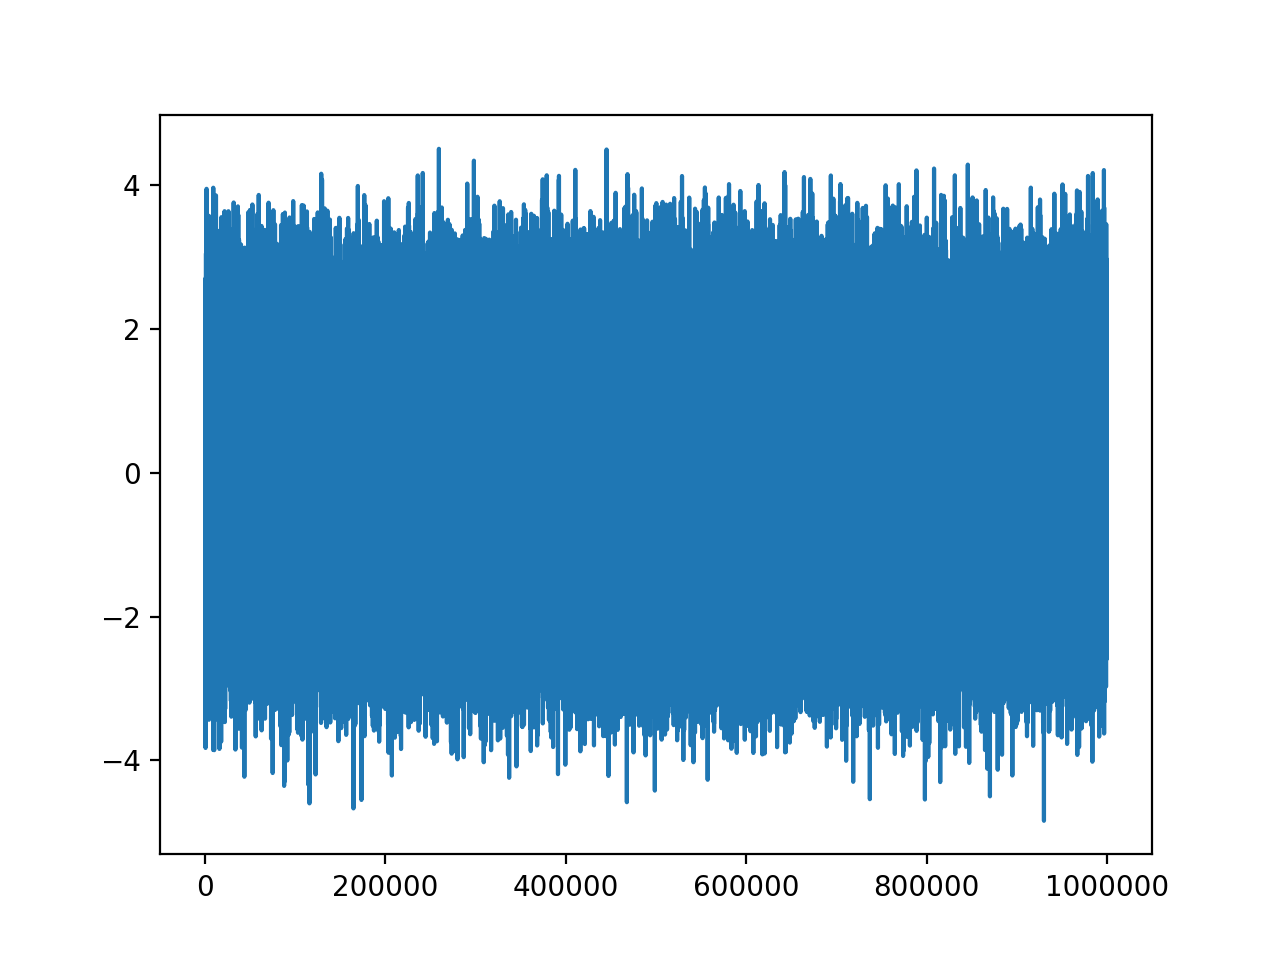

In [23]:
x = range(1,1000001)

%matplotlib notebook
plt.plot(x, data2)

<IPython.core.display.Javascript object>


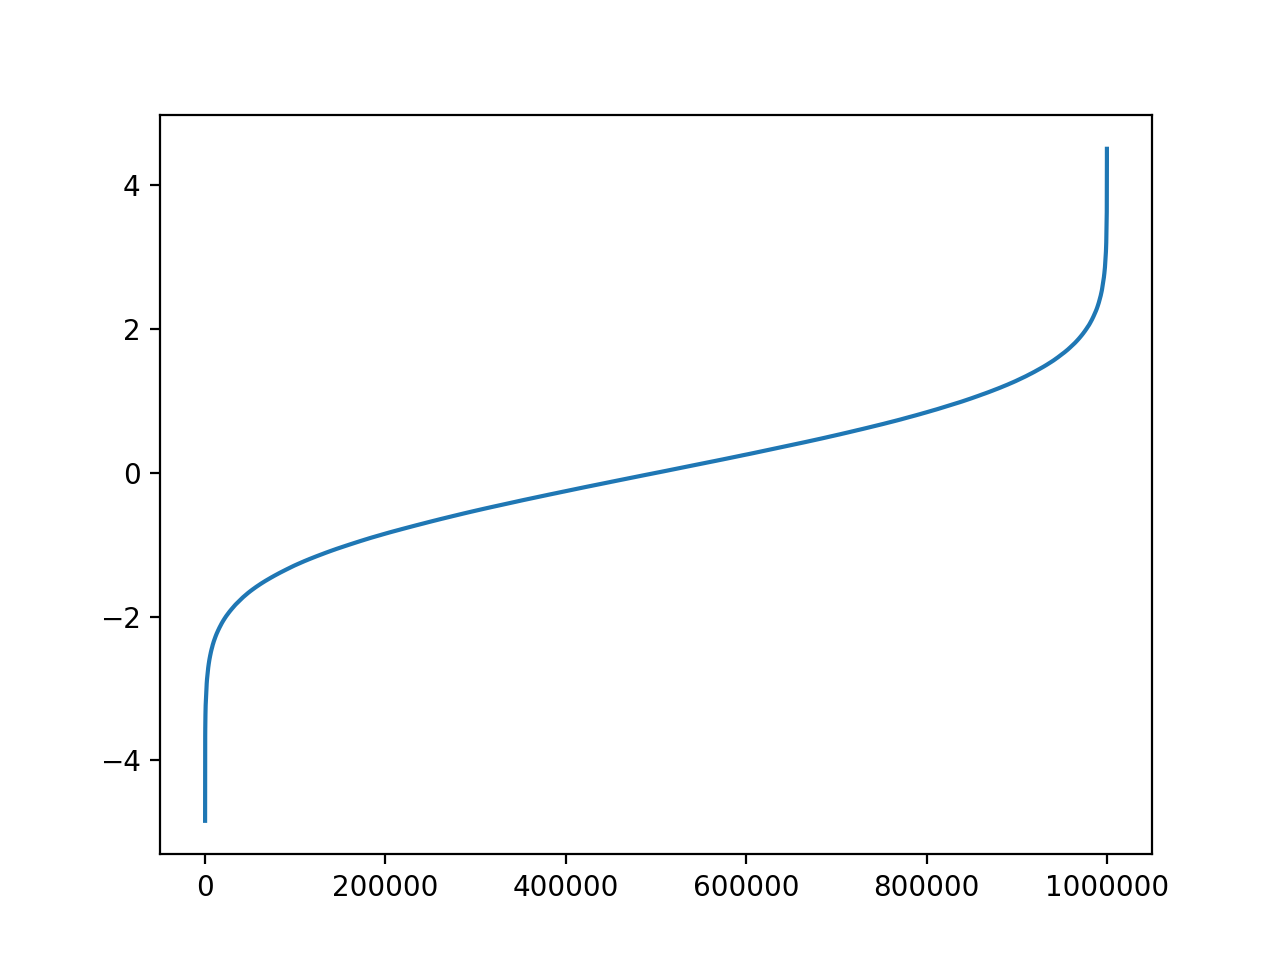

In [24]:
%matplotlib notebook
plt.plot(x, sorted(data2))

<IPython.core.display.Javascript object>


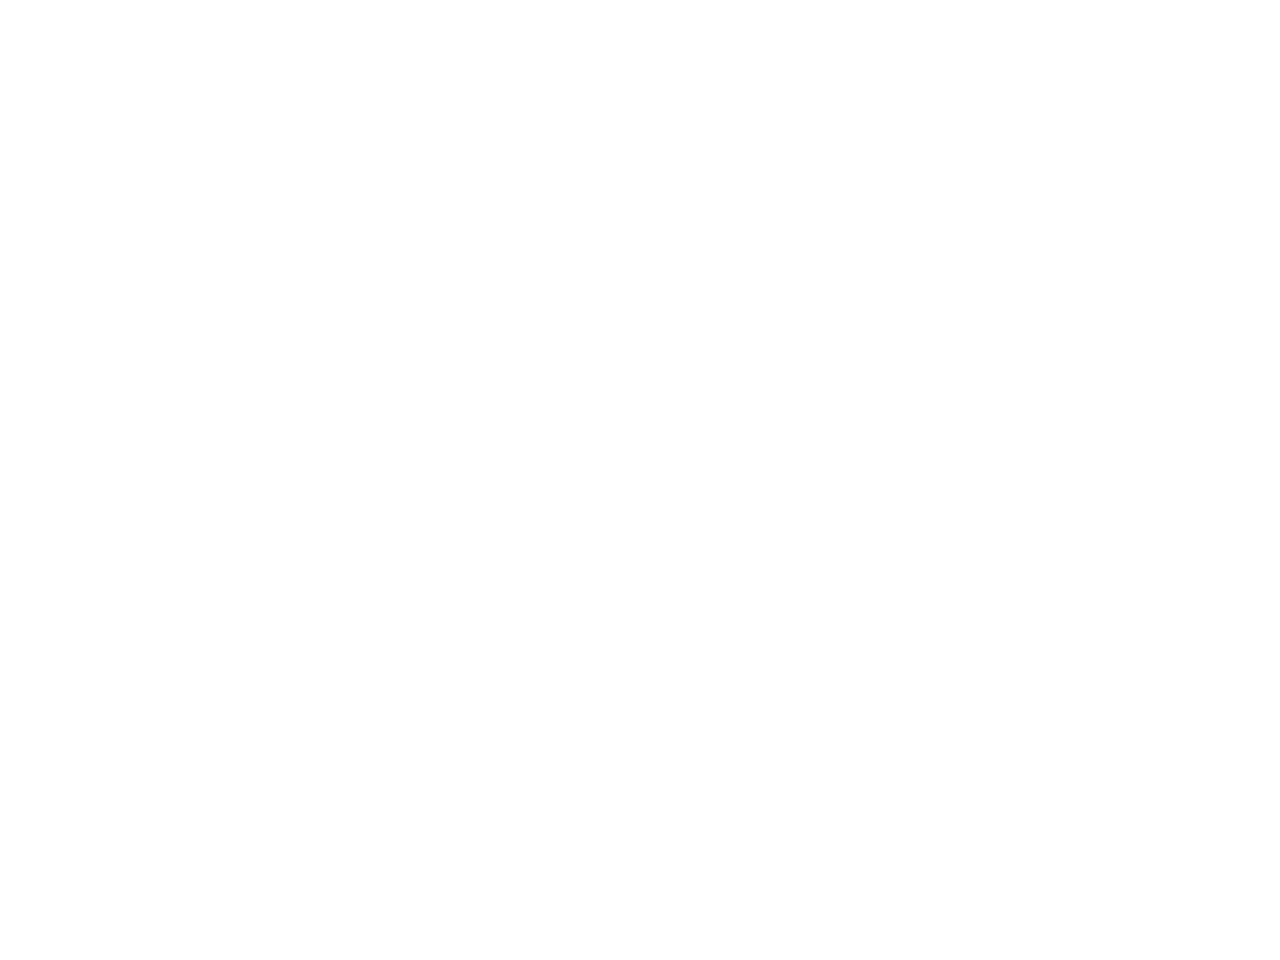

(array([  11.,   97.,  500., 1576., 2704., 2736., 1587.,  652.,  120.,
          17.]),
 array([-3.88388434, -2.02860255, -0.17332075,  1.68196104,  3.53724284,
         5.39252463,  7.24780643,  9.10308822, 10.95837002, 12.81365181,
        14.66893361]),
 <a list of 10 Patch objects>)

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data3 = mu +  sd * Z_10000 # Z = (X - mu) / sd -> X = mu + sd * Z ... Teorema central del limite, Normal (0,1)
%matplotlib notebook
plt.hist(data3)

# La simulacion de Monte Carlo

* Generamos 2 numeros aleatorios uniformes x e y entre 0 y 1 en total 1000 veces
* Calcularemos x . x + y . y
    * Si el valor es menor a 1, estamos dentro del circulo
    * Si el valor es mayor a 1, estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos esa probabilidad para aproximar al valor de π.
* Repetimos el experimiento un numero suficiente de veces (100) para obtener (100) diferentes aproximaciones a π
* Calculamos el promedio de 100 experimientos anteriores para obtener el valor final de π

3.139925999999999


(3.139925999999999, [<matplotlib.lines.Line2D at 0x1197a0208>])

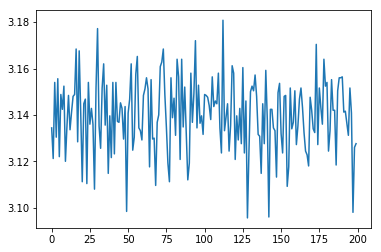

In [9]:
def pi_montecarlo (n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = x[j] * x[j] + y[j] * y[j]
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp

    print(pi)
    %matplotlib inline
    fig = plt.plot(pi_value_list)
    return(pi, fig)
    
pi_montecarlo(10000,200)    

# Dummy data sets

In [10]:
n = 10000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32,n)        
    }
)

In [11]:
data.head()

,A,B,C
0,1.120567,0.588303,22.297353
1,1.479955,1.146099,7.584538
2,1.556472,4.621049,23.129232
3,1.496825,-1.011125,8.389104
4,-1.132307,3.062201,27.630973


In [12]:
data.describe()

,A,B,C
count,10000.000000,10000.000000,10000.000000
mean,0.005255,1.488541,18.496142
std,1.001340,2.519315,7.801512
min,-3.891879,-8.728753,5.001619
25%,-0.666409,-0.208203,11.538566
50%,0.004599,1.513434,18.514992
75%,0.692917,3.174865,25.134408
max,4.000923,10.863103,31.991086


(array([  10.,   87.,  538., 1679., 2873., 2775., 1553.,  411.,   65.,
           9.]),
 array([-3.89187923, -3.10259901, -2.31331879, -1.52403857, -0.73475835,
         0.05452187,  0.84380209,  1.63308231,  2.42236252,  3.21164274,
         4.00092296]),
 <a list of 10 Patch objects>)

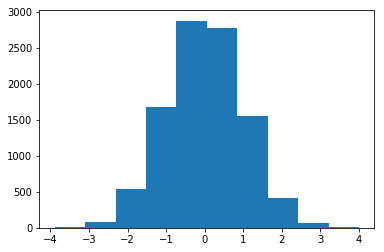

In [13]:
plt.hist(data["A"])

(array([   6.,   61.,  367., 1284., 2607., 2977., 1890.,  661.,  136.,
          11.]),
 array([-8.72875309, -6.76956745, -4.8103818 , -2.85119616, -0.89201052,
         1.06717513,  3.02636077,  4.98554642,  6.94473206,  8.90391771,
        10.86310335]),
 <a list of 10 Patch objects>)

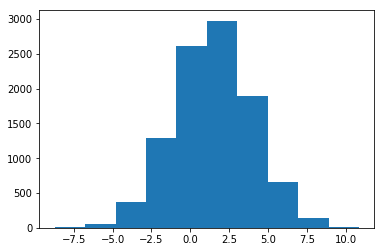

In [14]:
plt.hist(data["B"])

(array([ 988., 1025., 1016.,  941., 1023., 1017.,  970., 1040.,  958.,
        1022.]),
 array([ 5.0016191 ,  7.70056582, 10.39951254, 13.09845926, 15.79740599,
        18.49635271, 21.19529943, 23.89424615, 26.59319288, 29.2921396 ,
        31.99108632]),
 <a list of 10 Patch objects>)

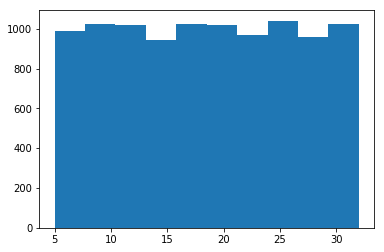

In [15]:
plt.hist(data["C"])

In [16]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [17]:
column_names = data.columns.values.tolist()

In [18]:
a = len(column_names)
column_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [19]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(5,32,a)         
    }, index = range(42, 42 + a)
)

In [20]:
new_data

,Column Name,A,B
42,State,-1.442477,27.439795
43,Account Length,-0.016500,30.234178
44,Area Code,-0.219034,26.087170
45,Phone,-1.713943,8.008542
46,Int'l Plan,-0.789016,30.880629
47,VMail Plan,-0.689302,18.323844
48,VMail Message,-0.197264,19.694058
49,Day Mins,-1.022494,11.534078
50,Day Calls,0.904863,5.451437
51,Day Charge,-0.313377,20.418508
